#Deep Learning con Python
`Autor: Erwing FC 
~erwingforerocastro@gmail.com`

El siguiente ejercicio es un clasificador de texto segun el sentimiento del mismo (positivo o negativo) en base a comentarios de IMDB.

In [56]:
from keras.datasets import imdb
(train_data, train_labels), (test_data, test_labels) = imdb.load_data(
num_words=10000) #trabajaremos con las 10000 palabras importantes para reducir el tamaño de los vectores

print(len(train_data[1]))
print(train_data[0]) #train data contiene numeros que representan las palabras del diccionario
print(train_labels[0]) #como etiqueta 1 o 0

189
[1, 14, 22, 16, 43, 530, 973, 1622, 1385, 65, 458, 4468, 66, 3941, 4, 173, 36, 256, 5, 25, 100, 43, 838, 112, 50, 670, 2, 9, 35, 480, 284, 5, 150, 4, 172, 112, 167, 2, 336, 385, 39, 4, 172, 4536, 1111, 17, 546, 38, 13, 447, 4, 192, 50, 16, 6, 147, 2025, 19, 14, 22, 4, 1920, 4613, 469, 4, 22, 71, 87, 12, 16, 43, 530, 38, 76, 15, 13, 1247, 4, 22, 17, 515, 17, 12, 16, 626, 18, 2, 5, 62, 386, 12, 8, 316, 8, 106, 5, 4, 2223, 5244, 16, 480, 66, 3785, 33, 4, 130, 12, 16, 38, 619, 5, 25, 124, 51, 36, 135, 48, 25, 1415, 33, 6, 22, 12, 215, 28, 77, 52, 5, 14, 407, 16, 82, 2, 8, 4, 107, 117, 5952, 15, 256, 4, 2, 7, 3766, 5, 723, 36, 71, 43, 530, 476, 26, 400, 317, 46, 7, 4, 2, 1029, 13, 104, 88, 4, 381, 15, 297, 98, 32, 2071, 56, 26, 141, 6, 194, 7486, 18, 4, 226, 22, 21, 134, 476, 26, 480, 5, 144, 30, 5535, 18, 51, 36, 28, 224, 92, 25, 104, 4, 226, 65, 16, 38, 1334, 88, 12, 16, 283, 5, 16, 4472, 113, 103, 32, 15, 16, 5345, 19, 178, 32]
1


In [ ]:
#Debido a que se limita a las 10,000 palabras más frecuentes, ningún índice de palabras excederá las 10,000:
max([max(sequence) for sequence in train_data]) 

In [ ]:
#asi decodificamos las palabras 
word_index = imdb.get_word_index()
reverse_word_index = dict([(value, key) for (key, value) in word_index.items()])
decoded_review = ' '.join([reverse_word_index.get(i - 3, '?') for i in train_data[0]])

decoded_review

##Preparamos los datos

In [51]:
import numpy as np
#esto retornara un tensor 2D, y por fila de la siguiente forma [0,0,0,1,...,0] 
def vectorize_sequences(sequences,dimension=10000):
  results=np.zeros((len(sequences),dimension))
  for i, sequence in enumerate(sequences):
       results[i, sequence] = 1.
  return results

x_train = vectorize_sequences(train_data)
x_test = vectorize_sequences(test_data)

#vectorizamos las etiquetas
y_train = np.asarray(train_labels).astype('float32')
y_test = np.asarray(test_labels).astype('float32')

print(x_train.shape)
print(x_train[0])
print()
print(train_labels.shape)
print(train_labels[0])

(25000, 10000)
[0. 1. 1. ... 0. 0. 0.]

(25000,)
1


##Arquitectura de la red

In [ ]:
from keras import models,layers
net=models.Sequential()
net.add(layers.Dense(16,activation='relu',input_shape=(10000,))) 
net.add(layers.Dense(16,activation='relu'))
net.add(layers.Dense(1,activation='sigmoid'))

net.summary()

#1 capa de entrada, 1 oculta y 1 de salida
#1 capa con la función de unidad lineal rectificada 
#2 capa con la función de unidad lineal rectificada
#3 capa con la función de clasificación sigmoide

##compilacion del modelo

In [52]:
net.compile(optimizer='rmsprop',
            loss='binary_crossentropy',
            metrics=['accuracy'])
x_train.shape

(25000, 10000)

In [15]:
#ejemplos de validación
x_val = x_train[:10000]
partial_x_train = x_train[10000:]
y_val = y_train[:10000]
partial_y_train = y_train[10000:]

#10000 de entrenamiento y 15000 de validación

##Entrenamiento del modelo

In [ ]:
history=net.fit(partial_x_train,partial_y_train,
                epochs=20,
                batch_size=512,
                validation_data=(x_val,y_val))

In [41]:
history_dict=history.history
history_dict.keys()

dict_keys(['loss', 'accuracy'])

En los siguientes graficos se puede ver claramente como no necesariamente por tener un buen desempeño en el entrenamiento del modelo, se ajustara a valores no vistos.

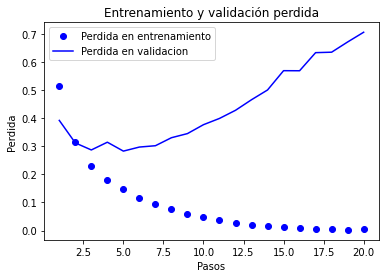

In [23]:
import matplotlib.pyplot as plt

loss_values = history_dict['loss']
val_loss_values = history_dict['val_loss']
epochs = range(1, len(history_dict['accuracy']) + 1)

plt.plot(epochs, loss_values, 'bo', label='Perdida en entrenamiento')
plt.plot(epochs, val_loss_values, 'b', label='Perdida en validacion')
plt.title('Entrenamiento y validación perdida')
plt.xlabel('Pasos')
plt.ylabel('Perdida')
plt.legend()
plt.show()

In [ ]:
plt.clf() 
acc_values = history_dict['accuracy']
val_acc_values = history_dict['val_accuracy']
plt.plot(epochs, acc_values, 'bo', label='Entrenamiento precisión')
plt.plot(epochs, val_acc_values, 'b', label='Validación precisión')
plt.title('Entrenamiento y validación Precisión')
plt.xlabel('Pasos')
plt.ylabel('Precisión')
plt.legend()
plt.show()

Entrenaremos un nuevo modelo para evitar el sobreajuste antes visto

In [ ]:
#arquitectura
net = models.Sequential()
net.add(layers.Dense(16, activation='relu', input_shape=(10000,)))
net.add(layers.Dense(16, activation='relu'))
net.add(layers.Dense(1, activation='sigmoid'))

#compilación
net.compile(optimizer='rmsprop',
loss='binary_crossentropy',
metrics=['accuracy'])

#entrenammiento
history=net.fit(x_train, y_train, epochs=4, batch_size=512)

#evaluamos el modelo
results = net.evaluate(x_test, y_test)
results #precision del 88%

##Predicción

In [57]:
print('Valor predicho:\n',net.predict(x_test))

Valor predicho:
 [[0.18044485]
 [0.9988049 ]
 [0.756498  ]
 ...
 [0.10500307]
 [0.05925291]
 [0.8637546 ]]
